## Step 1 : Raw Data Collection


## Step 2: Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

## Step 3 : Importing the Dataset

In [2]:
dataset = pd.read_csv("Dentistry.csv")

In [3]:
dataset.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


##  Step 4 : Data Preprocessing

###### Identify and handle missing values

In [4]:
# Check missing values:
print("Missing Values")
dataset.isnull().sum()

Missing Values


Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [5]:
dataset.shape

(1100, 14)

In [6]:
# Drop Unnecessary Columns:
dataset.drop(['Sample ID', 'Sl No'], axis = 1, inplace = True)

In [7]:
dataset.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


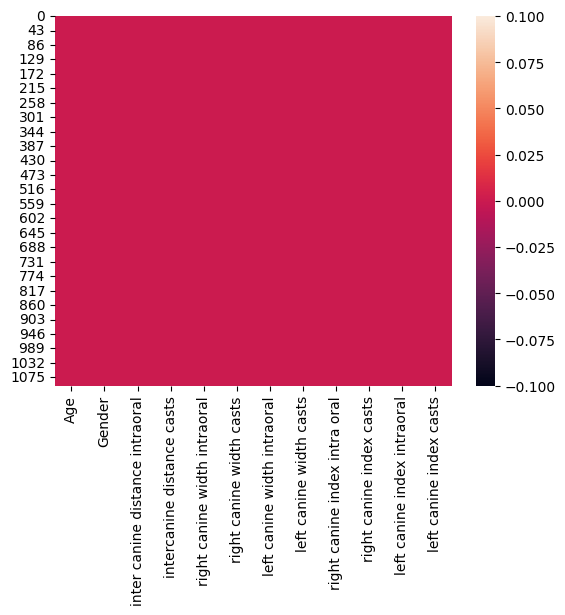

In [8]:
sns.heatmap(dataset.isnull())
plt.show()

###### Encoding Catagorical Data :

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [10]:
dataset.describe()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [11]:
le = LabelEncoder()
le.fit_transform(dataset["Gender"])

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
dataset["Gender"] = le.transform(dataset["Gender"])

In [13]:
dataset.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


###### Split independent veririables and dependent veriables:

In [14]:
X = dataset.drop("Gender", axis=1)    # independent veriables
y = dataset["Gender"]                 # dependent veriables

In [15]:
X

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...
1095,24,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, Length: 1100, dtype: int64

###### Normalize X veriables

In [17]:
X.head()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [18]:
# Normalize the X veriables using by MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[0.85714286, 0.26981919, 0.77871266, ..., 0.24050633, 0.23170732,
        0.22222222],
       [0.57142857, 0.36995828, 0.80984434, ..., 0.17721519, 0.29268293,
        0.2962963 ],
       [0.71428571, 0.09874826, 0.72738746, ..., 0.3164557 , 0.5       ,
        0.50617284],
       ...,
       [1.        , 0.15577191, 0.7446361 , ..., 0.62025316, 0.59756098,
        0.60493827],
       [0.42857143, 0.2433936 , 0.77114009, ..., 0.51898734, 0.53658537,
        0.54320988],
       [0.71428571, 0.19332406, 0.75599495, ..., 0.4556962 , 0.64634146,
        0.65432099]])

## Step 5: Exploatry Data Analysis (EDA)

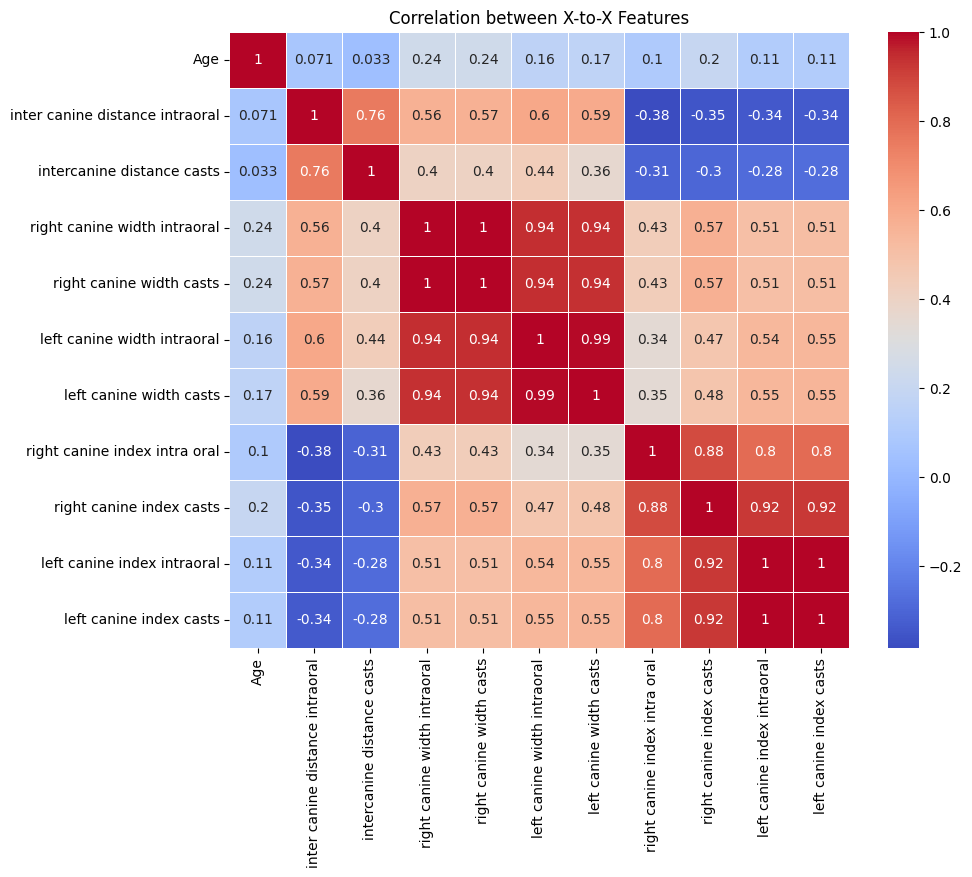

In [20]:
# check the correlation between X-to-X Features:
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths = 0.5)
plt.title("Correlation between X-to-X Features")
plt.show()

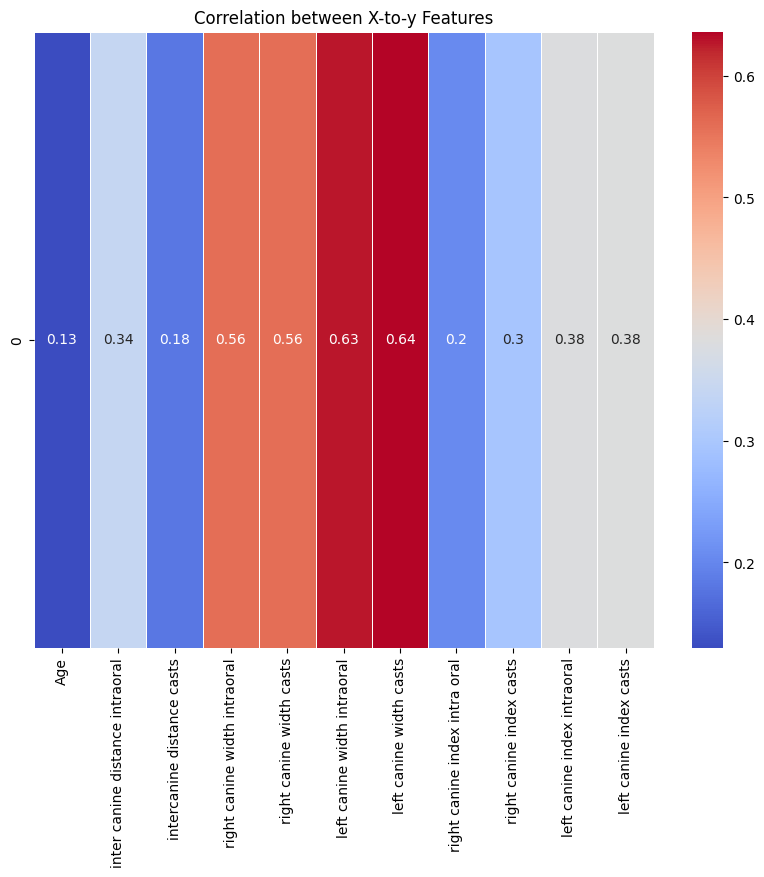

In [21]:
# correlation between X to y features:
corr_xy = X.apply(lambda x: x.corr(y))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_xy.to_frame().T, annot=True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation between X-to-y Features")
plt.show()

## Step 6 : Model Building 

###### Drop unwanted independent veriables:

In [22]:
dataset.drop(['left canine width intraoral', 'left canine width casts', 'right canine index intra oral', 'right canine index casts'], axis=1, inplace=True)

###### Drop the independent features which are highly correlated to each other:

In [23]:
# Calculate the correlation matrix:
corr_matrix = dataset.corr()

In [24]:
# select the upper triangle of the correlation matrix:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [25]:
# find the features with high correlation:
high_corr_features = [column for column in upper.columns if any(abs(upper[column]) > 0.9)]

In [26]:
# Drop the highly correlated features:

dataset.drop(high_corr_features, axis=1, inplace=True)
print("Reamaining Features", dataset.columns)

Reamaining Features Index(['Age', 'Gender', 'inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'left canine index intraoral'],
      dtype='object')


###### Split the Data into Train and Test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# split the data into features X and y target:
X = dataset.drop(["Age", "Gender"], axis=1)
y = dataset[["Age", "Gender"]]

In [29]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (880, 11) (880,)
Testing data shape: (220, 11) (220,)


###### Use Logistic Regression, Decision Tree classifier, Random Forest classifier and XGBoost classifier:

In [30]:
# Define the Classifier

classifiers = {'Logistic Regression': LogisticRegression(),
              'Decision Tree': DecisionTreeClassifier(),
              'Random Forest': RandomForestClassifier(),
              'XGBoost': XGBClassifier(),}
              

In [31]:
# Encode the target veriables:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [32]:
# Train evaluate each classifier :
for name, clf in classifiers.items():
    clf.fit(X_train, y_train_encoded)
    y_pred = clf.predict(X_test)

In [33]:
print(f" Classifier: {name}")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))
print("Confusion Matrixs:")
print(confusion_matrix(y_test_encoded, y_pred))

 Classifier: XGBoost
Accuracy: 0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       113
           1       0.90      0.92      0.91       107

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220

Confusion Matrixs:
[[102  11]
 [  9  98]]


## : Evaluation

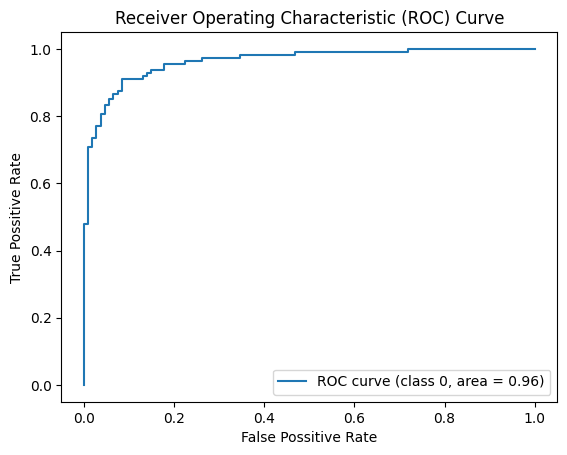

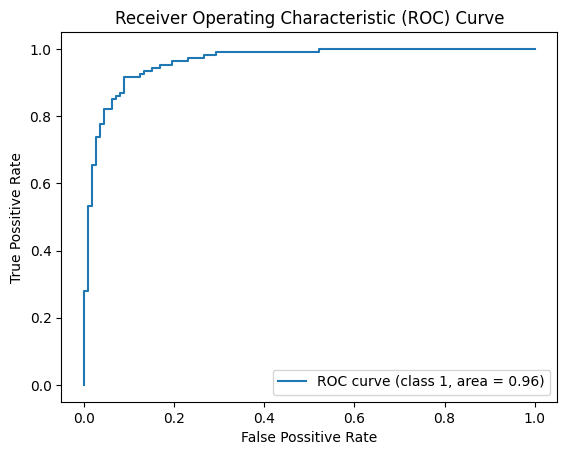

In [34]:
for i in range(2):  # 2 classes
    y_test_binary = (y_test_encoded==i).astype(int)
    y_pred_proba = (clf.predict_proba(X_test)[:, i])
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'ROC curve (class {i}, area = {roc_auc:.2f})')
    plt.xlabel('False Possitive Rate')
    plt.ylabel('True Possitive Rate')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc = "lower right")
    plt.show()